In [0]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [0]:
from keras.datasets import mnist

#download mnist data and split into train and testing data sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

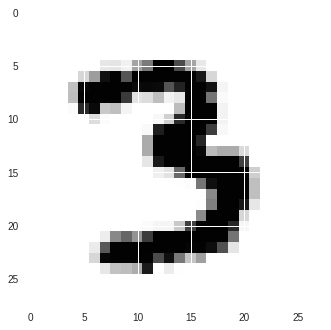

In [38]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(x_test[500])

In [39]:
#shape of the image
x_train[0].shape
# 28 * 28 pixels i.e., 784

(28, 28)

In [0]:
# Data pre-processing
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
# The last number is 1, which signifies that the images are greyscale.

In [41]:
# We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Building the Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#Create a Model
model = Sequential()
# The model type that we will be using is Sequential.
# Sequential is the easiest way to build a model in Keras.
# It allows you to build a model layer by layer

#add Model Layers
# ‘add()’ function to add layers to our model.
# Our first 2 layers are Conv2D layers. 
# These are convolution layers that will deal with our input images, 
# which are seen as 2-dimensional matrices.
# Kernel size is the size of the filter matrix for our convolution. 
# So a kernel size of 3 means we will have a 3x3 filter matrix.
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
''' model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
# Our first layer also takes in an input shape. 
# This is the shape of each input image, 
# 28,28,1 as seen earlier on, with the 1 signifying that the images 
# are greyscale.
# In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. 
# Flatten serves as a connection between the convolution and dense layers.
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
# ‘Dense’ is the layer type we will use in for our output layer. 
# Dense is a standard layer type that is used in many cases for neural networks.
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu',
                 input_shape=(28,28,1)))'''
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# The activation is ‘softmax’. Softmax makes the output sum up to 1 
# so the output can be interpreted as probabilities. 
# The model will then make its prediction based on which option 
# has the highest probability.


In [0]:
# Compiling the Model
# Compiling the model takes three parameters: 
# optimizer, loss and metrics.
# Compile model using accuracy to measure model perfomance
model.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.*italicized text*

In [44]:
#Training the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 373us/step - loss: 11.9329 - acc: 0.2593 - val_loss: 11.8364 - val_acc: 0.2656
Epoch 2/20
60000/60000 [==============================] - 16s 261us/step - loss: 11.5964 - acc: 0.2805 - val_loss: 11.2940 - val_acc: 0.2993
Epoch 3/20
60000/60000 [==============================] - 16s 259us/step - loss: 11.7176 - acc: 0.2730 - val_loss: 11.3794 - val_acc: 0.2940
Epoch 4/20
60000/60000 [==============================] - 16s 261us/step - loss: 11.4081 - acc: 0.2922 - val_loss: 11.3794 - val_acc: 0.2940
Epoch 5/20
60000/60000 [==============================] - 16s 262us/step - loss: 11.4081 - acc: 0.2922 - val_loss: 11.3794 - val_acc: 0.2940
Epoch 6/20
60000/60000 [==============================] - 16s 267us/step - loss: 11.4081 - acc: 0.2922 - val_loss: 11.3794 - val_acc: 0.2940
Epoch 7/20
60000/60000 [==============================] 

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will set the number of epochs to 3.

In [46]:
model.predict(x_test[:5])
# x_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)